Deep Learning Practical Assignment 3 A - Plant Leaves Disease Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


From original plant dataset tomato directory selected for training and testing with only 200 images from each disease. There are 3 diseases and 1 healthy. Total 4 directories selected each for training and testing so total 1600 images considered.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
import numpy as np

Dataset is stored on google drive with Train and Test folder.

In [3]:
train_dir = r'/content/drive/MyDrive/Colab_Notebooks/LP5/DL/3/A/Train'
test_dir = r'/content/drive/MyDrive/Colab_Notebooks/LP5/DL/3/A/Test'

In [4]:
img_size = 224
batch_size = 32

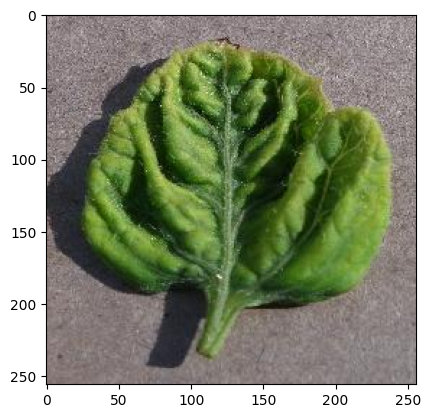

In [6]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

# reading the image
testImage = img.imread('/content/drive/MyDrive/Colab_Notebooks/LP5/DL/3/A/Train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/013864a9-fc42-4357-8bfe-0d638ce2fc7f___YLCV_GCREC 2023.JPG')

# displaying the image
plt.imshow(testImage)

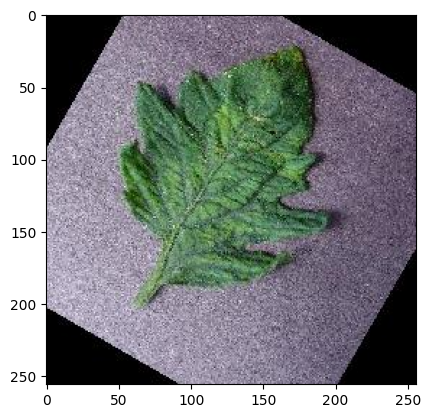

In [7]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

# reading the image
testImage = img.imread('/content/drive/MyDrive/Colab_Notebooks/LP5/DL/3/A/Train/Tomato___Tomato_mosaic_virus/dcb74f2b-c523-4147-b9ce-690800411273___PSU_CG 2154_new30degFlipLR.JPG')

# displaying the image
plt.imshow(testImage)


Image Preprocessing

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical')

Found 800 images belonging to 4 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical')

Found 800 images belonging to 4 classes.


Categories are identified.

In [10]:
class_names=list(train_generator.class_indices)
class_names

['Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [11]:
class_names=list(test_generator.class_indices)
class_names

['Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

Model Building

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, BatchNormalization

In [13]:
model = Sequential()
model.add((Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size, 3))))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Conv2D(64, (3,3), activation='relu')))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Conv2D(64, (3,3), activation='relu')))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Conv2D(128, (3,3), activation='relu')))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Flatten()))
model.add((Dense(128, activation='relu')))
model.add((Dropout(0.2)))
model.add((Dense(64, activation='relu')))
model.add((Dense(train_generator.num_classes, activation='softmax')))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50
25/25 [==============================] - 454s 18s/step - loss: 1.5466 - accuracy: 0.7050 - val_loss: 1.5825 - val_accuracy: 0.4050
Epoch 2/50
25/25 [==============================] - 9s 360ms/step - loss: 0.3087 - accuracy: 0.9187 - val_loss: 7.4365 - val_accuracy: 0.2500
Epoch 3/50
25/25 [==============================] - 10s 389ms/step - loss: 0.2243 - accuracy: 0.9425 - val_loss: 7.2829 - val_accuracy: 0.3250
Epoch 4/50
25/25 [==============================] - 9s 363ms/step - loss: 0.2321 - accuracy: 0.9438 - val_loss: 10.9650 - val_accuracy: 0.2500
Epoch 5/50
25/25 [==============================] - 7s 297ms/step - loss: 0.2407 - accuracy: 0.9488 - val_loss: 13.9799 - val_accuracy: 0.2500
Epoch 6/50
25/25 [==============================] - 8s 331ms/step - loss: 0.2335 - accuracy: 0.9625 - val_loss: 18.9215 - val_accuracy: 0.2500
Epoch 7/50
25/25 [==============================] - 9s 363ms/step - loss: 0.1857 - accuracy: 0.9575 - val_loss: 18.5909 - val_accuracy: 0.2500
E

In [16]:
loss, accuracy = model.evaluate(test_generator)
print("Loss :",loss)
print("Accuracy (Test Data) :",accuracy*100)

25/25 [==============================] - 4s 152ms/step - loss: 0.7426 - accuracy: 0.9388
Loss : 0.7426008582115173
Accuracy (Test Data) : 93.87500286102295


Image is selected and predicted.

In [18]:
img_path =r'/content/drive/MyDrive/Colab_Notebooks/LP5/DL/3/A/Test/Tomato___Tomato_mosaic_virus/73be89b4-f57a-4230-a0e4-4a0f50230fc7___PSU_CG 2142_new30degFlipLR.JPG'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255

In [19]:
print(img_array.shape)

(1, 224, 224, 3)


In [20]:
prediction = model.predict(img_array)

1/1 [==============================] - 0s 468ms/step


In [21]:
predicted_class = np.argmax(prediction)
print('Predicted class:', class_names[predicted_class])

Predicted class: Tomato___Tomato_mosaic_virus


In [22]:
img_path =r'/content/drive/MyDrive/Colab_Notebooks/LP5/DL/3/A/Test/Tomato___Tomato_mosaic_virus/73be89b4-f57a-4230-a0e4-4a0f50230fc7___PSU_CG 2142_new30degFlipLR.JPG'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
print('Predicted class:', class_names[predicted_class])

1/1 [==============================] - 0s 21ms/step
Predicted class: Tomato___Tomato_mosaic_virus
